# **Framing the Problem**

Learning Type
   - Supervised Learning since our training examples are labelled
   
Task Type
   - Multivariate Binary Classification Task since we are predicting a category ('high_blood_pressure' or 'not high_blood_pressure') based on multiple features
    
Technique Type
   - Batch Learning can be used since there is no constant flow of data coming in
   
Performance Measure Type
   - Given the nature of the datasets and classification task, we will use accuracy as our main scoring metric

In [1]:
###IMPORT PACKAGES###

import math
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pdp
import statsmodels.api as sm
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
###ANALYZING DATASET###

#Get the Dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(['time', 'DEATH_EVENT'], axis=1)

#Display Information About our Dataset and its Features
#report = pdp.ProfileReport(df)
#display(report)

In [3]:
###CLEANING AND PREPARING THE TRAINING DATA##

#Mute a Warning
pd.options.mode.chained_assignment = None  # default='warn'

#Create Age Category Variable
#df['AgeCat'] = ''
#df['AgeCat'].loc[(df['age'] <= 55)] = 'adult'
#df['AgeCat'].loc[(df['age'] > 55) & (df['age'] <= 70)] = 'early senior'
#df['AgeCat'].loc[(df['age'] > 70)] = 'late senior'
#df = df.drop(['age'], axis=1)

#Create Ejection Fraction Category Variable
df['EF'] = ''
df['EF'].loc[(df['ejection_fraction'] <= 30)] = 'low'
df['EF'].loc[(df['ejection_fraction'] > 30) & (df['ejection_fraction'] <= 45)] = 'normal'
df['EF'].loc[(df['ejection_fraction'] > 45)] = 'high'
df = df.drop(['ejection_fraction'], axis=1)

#Create Platelets Category Variable
df['Plat'] = ''
df['Plat'].loc[(df['platelets'] <= 212500)] = 'low'
df['Plat'].loc[(df['platelets'] > 212500) & (df['platelets'] <= 303500)] = 'normal'
df['Plat'].loc[(df['platelets'] > 303500)] = 'high'
df = df.drop(['platelets'], axis=1)

#Create Serum Creatinine Category Variable
df['SC'] = ''
df['SC'].loc[(df['serum_creatinine'] <= 1.5)] = 'normal'
df['SC'].loc[(df['serum_creatinine'] > 1.5)] = 'high'
df = df.drop(['serum_creatinine'], axis=1)

#Create Serum Sodium Category Variable
#df['SS'] = ''
#df['SS'].loc[(df['serum_sodium'] < 135)] = 'low'
#df['SS'].loc[(df['serum_sodium'] >= 135) & (df['serum_sodium'] <= 145)] = 'normal'
#df['SS'].loc[(df['serum_sodium'] > 145)] = 'high'
#df = df.drop(['serum_sodium'], axis=1)

In [4]:
###ENCODING THE DATASET###

encoder = LabelEncoder()

#Encode AgeCat
#AgeCat = df['AgeCat']
#AgeCat_encoded = encoder.fit_transform(AgeCat)
#df['AgeCat'] = AgeCat_encoded
#print(encoder.classes_, '[0, 1, 2]')

#Encode CPK
#CPK = df['CPK']
#CPK_encoded = encoder.fit_transform(CPK)
#df['CPK'] = CPK_encoded
#print(encoder.classes_, '[0, 1, 2]')

#Encode EF
EF = df['EF']
EF_encoded = encoder.fit_transform(EF)
df['EF'] = EF_encoded
print(encoder.classes_, '[0, 1, 2]')

#Encode Plat
Plat = df['Plat']
Plat_encoded = encoder.fit_transform(Plat)
df['Plat'] = Plat_encoded
print(encoder.classes_, '[0, 1, 2]')

#Encode SC
SC = df['SC']
SC_encoded = encoder.fit_transform(SC)
df['SC'] = SC_encoded
print(encoder.classes_, '[0, 1]')

#Encode SS
#SS = df['SS']
#SS_encoded = encoder.fit_transform(SS)
#df['SS'] = SS_encoded
#print(encoder.classes_, '[0, 1, 2]')

['high' 'low' 'normal'] [0, 1, 2]
['high' 'low' 'normal'] [0, 1, 2]
['high' 'normal'] [0, 1]


In [5]:
###REPORT AFTER PREPROCESSING###

#report2 = pdp.ProfileReport(df)
#display(report2)

In [6]:
###SPLITTING DATASET INTO TRAIN AND TEST###

#Scale Data and Create Data Splits
sc = StandardScaler()
y = df['high_blood_pressure'].copy()
X = df.drop(['high_blood_pressure'], axis=1)
X = sc.fit_transform(X)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

In [7]:
###SUMMARIZE THE DATA###

df.describe() 

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_sodium,sex,smoking,EF,Plat,SC
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,0.351171,136.625418,0.648829,0.32107,1.287625,1.247492,0.775920
std,11.894809,0.496107,970.287881,0.494067,0.478136,4.412477,0.478136,0.46767,0.779916,0.830795,0.417674
min,40.000000,0.000000,23.000000,0.000000,0.000000,113.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,0.000000,134.000000,0.000000,0.00000,1.000000,0.500000,1.000000
50%,60.000000,0.000000,250.000000,0.000000,0.000000,137.000000,1.000000,0.00000,1.000000,1.000000,1.000000
75%,70.000000,1.000000,582.000000,1.000000,1.000000,140.000000,1.000000,1.00000,2.000000,2.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,1.000000,148.000000,1.000000,1.00000,2.000000,2.000000,1.000000


age                          11.894809
anaemia                       0.496107
creatinine_phosphokinase    970.287881
diabetes                      0.494067
high_blood_pressure           0.478136
serum_sodium                  4.412477
sex                           0.478136
smoking                       0.467670
EF                            0.779916
Plat                          0.830795
SC                            0.417674
dtype: float64


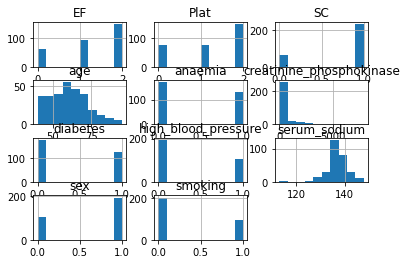

In [8]:
###EXTRACT AND PLOT THE STANDARD DEVIATIONS###

print(df.std())
df.hist()
plt.show()

[1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1
 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0
 0 1]
Gaussian Naive Bayes Score:  0.48 


Gaussian NB Best Features:  {'var_smoothing': 1e-09} 

[1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1
 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0
 0 1]
Gaussian Naive Bayes Score:  0.48
Gaussian Naive Bayes CV Score:  0.56


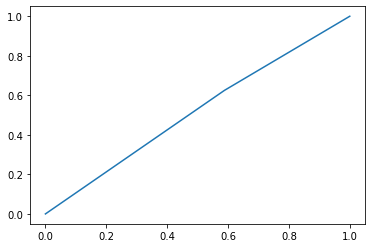

In [9]:
###NAIVE BAYES###

#Default Parameters
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
gnbPred = gnb.predict(Xtest)
print(gnbPred) 
gnbScore = round(accuracy_score(ytest, gnbPred), 2)
print('Gaussian Naive Bayes Score: ', gnbScore, '\n\n')

#Grid Search for Best Parameters
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
gnbGrid = GaussianNB()
gridSearch = GridSearchCV(estimator=gnbGrid, param_grid=params, cv=5, scoring='accuracy')
gridSearch.fit(Xtrain, ytrain)
print('Gaussian NB Best Features: ', gridSearch.best_params_, '\n')

#Best Parameters
gnb = GaussianNB(var_smoothing=1e-9)
gnb.fit(Xtrain, ytrain)
gnbPred = gnb.predict(Xtest)
print(gnbPred) 
gnbScore = round(accuracy_score(ytest, gnbPred), 2)
print('Gaussian Naive Bayes Score: ', gnbScore)
gnb_cv_score = cross_val_score(gnb, Xtrain, ytrain, cv = 5)
print('Gaussian Naive Bayes CV Score: ', round(gnb_cv_score.mean(), 2))
      
#ROC for Amount-Only Classifier
fpr, tpr, _ = roc_curve(ytest, gnbPred)
ax = sns.lineplot(fpr, tpr)

[1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1]
Perceptron Score:  0.63 


Perceptron Best Features:  {'max_iter': 500, 'penalty': 'l2', 'random_state': 0} 

[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1]
Perceptron Score:  0.63
Perceptron CV Score:  0.54


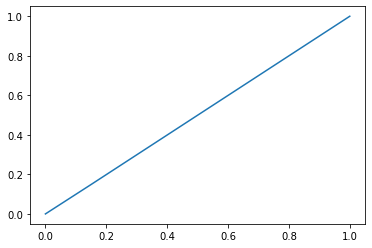

In [10]:
###PERCEPTRON###

#Default Parameters
percep = Perceptron()
percep.fit(Xtrain, ytrain)
percepPred = percep.predict(Xtest)
print(percepPred) 
percepScore = round(accuracy_score(ytest, percepPred), 2)
print('Perceptron Score: ', percepScore, '\n\n')

#Grid Search for Best Parameters
params = {'random_state': [0],
          'penalty': ['l1', 'l2', 'elasticnet'],
          'max_iter': range(500, 1500, 50)}
percepGrid = Perceptron()
gridSearch = GridSearchCV(estimator=percepGrid, param_grid=params, cv=5, scoring='accuracy')
gridSearch.fit(Xtrain, ytrain)
print('Perceptron Best Features: ', gridSearch.best_params_, '\n')

#Best Parameters
percep = Perceptron(max_iter=500, penalty='l2', random_state=0)
percep.fit(Xtrain, ytrain)
percepPred = percep.predict(Xtest)
print(percepPred) 
percepScore = round(accuracy_score(ytest, percepPred), 2)
print('Perceptron Score: ', percepScore)
percep_cv_score = cross_val_score(percep, Xtrain, ytrain, cv = 5)
print('Perceptron CV Score: ', round(percep_cv_score.mean(), 2))

#ROC for Amount-Only Classifier
fpr, tpr, _ = roc_curve(ytest, percepPred)
ax = sns.lineplot(fpr, tpr)

[0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0
 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0
 0 0]
Decision Tree Score:  0.57 


Decision Tree Best Features:  {'criterion': 'entropy', 'max_features': 2, 'random_state': 0, 'splitter': 'best'} 

[0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0]
Decision Tree Score:  0.57
Decision Tree CV Score:  0.59


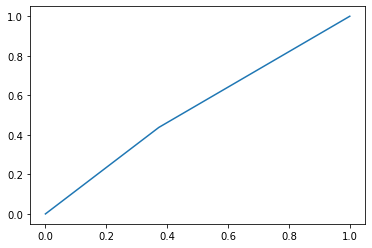

In [11]:
###DECISION TREE###

dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
dtPred = dt.predict(Xtest)
print(dtPred) 
dtScore = round(accuracy_score(ytest, dtPred), 2)
print('Decision Tree Score: ', dtScore, '\n\n')

#Grid Search for Best Parameters
params = {'random_state': [0],
          'criterion': ['gini', 'entropy'],
          'splitter':  ['best', 'random'],
          'max_features': [2, 4, 6, 8]}
dtGrid = DecisionTreeClassifier()
gridSearch = GridSearchCV(estimator=dtGrid, param_grid=params, cv=5, scoring='accuracy')
gridSearch.fit(Xtrain, ytrain)
print('Decision Tree Best Features: ', gridSearch.best_params_, '\n')

#Best Parameters
dt = DecisionTreeClassifier(criterion='entropy', max_features=2, random_state=0, splitter='best')
dt.fit(Xtrain, ytrain)
dtPred = dt.predict(Xtest)
print(dtPred) 
dtScore = round(accuracy_score(ytest, dtPred), 2)
print('Decision Tree Score: ', dtScore)
dt_cv_score = cross_val_score(dt, Xtrain, ytrain, cv = 5)
print('Decision Tree CV Score: ', round(dt_cv_score.mean(), 2))

#ROC for Amount-Only Classifier
fpr, tpr, _ = roc_curve(ytest, dtPred)
ax = sns.lineplot(fpr, tpr)

[0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1]
Logistic Regresion Score:  0.59 


Logistic Regression Best Features:  {'max_iter': 500, 'penalty': 'l2', 'random_state': 0} 

[0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1]
Logistic Regresion Score:  0.59
Logistic Regression CV Score:  0.56


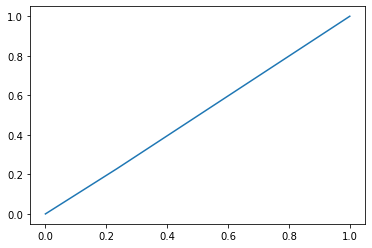

In [12]:
###LOGISTIC REGRESSION###

#Default Parameters
logReg = LogisticRegression()
logReg.fit(Xtrain, ytrain)
logRegPred = logReg.predict(Xtest)
print(logRegPred) 
logRegScore = round(accuracy_score(ytest, logRegPred), 2)
print('Logistic Regresion Score: ', logRegScore, '\n\n')

#Grid Search for Best Parameters
params = {'random_state': [0],
          'penalty': ['l2', 'none'],
          'max_iter': range(500, 1500, 50)}
logRegGrid = LogisticRegression()
gridSearch = GridSearchCV(estimator=logRegGrid, param_grid=params, cv=5, scoring='accuracy')
gridSearch.fit(Xtrain, ytrain)
print('Logistic Regression Best Features: ', gridSearch.best_params_, '\n')

#Best Parameters
logReg = LogisticRegression(max_iter=500, penalty='l2', random_state=0)
logReg.fit(Xtrain, ytrain)
logRegPred = logReg.predict(Xtest)
print(logRegPred) 
logRegScore = round(accuracy_score(ytest, logRegPred), 2)
print('Logistic Regresion Score: ', logRegScore)
logReg_cv_score = cross_val_score(logReg, Xtrain, ytrain, cv = 5)
print('Logistic Regression CV Score: ', round(logReg_cv_score.mean(), 2))

#ROC for Amount-Only Classifier
fpr, tpr, _ = roc_curve(ytest, logRegPred)
ax = sns.lineplot(fpr, tpr)

[0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1]
K Nearest Neighbours Score:  0.59 


K Nearest Neighbours Best Features:  {'metric': 'chebyshev', 'n_neighbors': 16, 'weights': 'uniform'} 

[0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1]
K Nearest Neigbors Score:  0.66
K Nearest Neigbors CV Score:  0.68


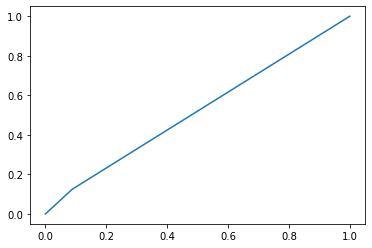

In [13]:
###K NEAREST NEIGHBOURS###

#Default Parameters
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
knnPred = knn.predict(Xtest)
print(knnPred)
knnScore = round(accuracy_score(ytest, knnPred), 2)
print('K Nearest Neighbours Score: ', knnScore, '\n\n')

#Grid Search for Best Parameters
params = {'n_neighbors': range(3,25),
          'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
         'weights': ['uniform', 'distance']}
knnGrid = KNeighborsClassifier()
gridSearch = GridSearchCV(estimator=knnGrid, param_grid=params, cv=5, scoring='accuracy')
gridSearch.fit(Xtrain, ytrain)
print('K Nearest Neighbours Best Features: ', gridSearch.best_params_, '\n')

#Best Parameters
knn = KNeighborsClassifier(metric='chebyshev', n_neighbors=16, weights='uniform')
knn.fit(Xtrain, ytrain)
knnPred = knn.predict(Xtest)
print(knnPred) 
knnScore = round(accuracy_score(ytest, knnPred), 2)
print('K Nearest Neigbors Score: ', knnScore)
knn_cv_score = cross_val_score(knn, Xtrain, ytrain, cv = 5)
print('K Nearest Neigbors CV Score: ', round(knn_cv_score.mean(), 2))

#ROC for Amount-Only Classifier
fpr, tpr, _ = roc_curve(ytest, knnPred)
ax = sns.lineplot(fpr, tpr)

[0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0
 0 1]
Random Forest Score:  0.59 


Random Forest Best Features:  {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 50, 'random_state': 0} 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Random Forest Score:  0.68
Random Forest CV Score:  0.62


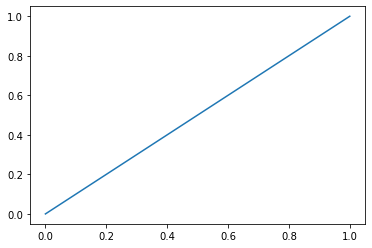

In [22]:
###RANDOM FOREST###

#Default Parameters
rf = RandomForestClassifier()
rf.fit(Xtrain, ytrain)
rfPred = rf.predict(Xtest)
print(rfPred)
rfScore = round(accuracy_score(ytest, rfPred), 2)
print('Random Forest Score: ', rfScore, '\n\n')

#Grid Search for Best Parameters
params = {'n_estimators': range(50, 150, 50),
          'criterion': ['gini', 'entropy'],
         'max_depth': [2, 3, 4, 5, 1000],
         'random_state': [0]}
rfGrid = RandomForestClassifier()
gridSearch = GridSearchCV(estimator=rfGrid, param_grid=params, cv=5, scoring='accuracy')
gridSearch.fit(Xtrain, ytrain)
print('Random Forest Best Features: ', gridSearch.best_params_, '\n')

#Best Parameters
rf = RandomForestClassifier(criterion='gini', max_depth=2, n_estimators=50, random_state=0)
rf.fit(Xtrain, ytrain)
rfPred = rf.predict(Xtest)
print(rfPred) 
rfScore = round(accuracy_score(ytest, rfPred), 2)
print('Random Forest Score: ', rfScore)
rf_cv_score = cross_val_score(rf, Xtrain, ytrain, cv = 5)
print('Random Forest CV Score: ', round(rf_cv_score.mean(), 2))

#ROC for Amount-Only Classifier
fpr, tpr, _ = roc_curve(ytest, rfPred)
ax = sns.lineplot(fpr, tpr)

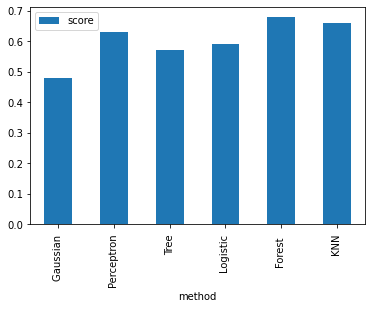

In [15]:
###GRAPH ACCURACIES OF MODELS##

Data = {'method': ['Gaussian ','Perceptron ','Tree ','Logistic ','Forest  ','KNN '],
        'score': [gnbScore,percepScore,dtScore,logRegScore,rfScore,knnScore]
       }
dfScores = pd.DataFrame(Data,columns=['method','score'])
dfScores.plot(x ='method', y='score', kind = 'bar')
plt.show()

Dig on using logistic regression

In [16]:
###DEEPER INVESTIGATION OF DATA FOR LOGISTIC REGRESSION###

data = dfScores
train_cols = data.columns[1:]
logit = sm.Logit(ytrain, Xtrain)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.655360
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     high_blood_pressure   No. Observations:                  149
Model:                           Logit   Df Residuals:                      139
Method:                            MLE   Df Model:                            9
Date:                 Fri, 27 Nov 2020   Pseudo R-squ.:                 0.01494
Time:                         03:42:23   Log-Likelihood:                -97.649
converged:                        True   LL-Null:                       -99.130
Covariance Type:             nonrobust   LLR p-value:                    0.9658
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1834      0.191      0.963      0.336      -0.190       0.557
x2            -0.0510      0.177     -0.287      0.774      -0.399       0.297
x3            -0.2581      0.211     -1.221      0.222      -0.672       0.156
x4            -0.1131      0.178     -0.636      0.525      -0.461       0.235
x5            -0.1616      0.173     -0.935      0.350      -0.500       0.177
x6            -0.3015      0.193     -1.558      0.119      -0.681       0.078
x7             0.2347      0.198      1.186      0.236      -0.153       0.623
x8            -0.2113      0.174     -1.216      0.224      -0.552       0.129
x9            -0.0498      0.173     -0.288      0.774      -0.389       0.289
x10            0.3798      0.187      2.026      0.043       0.012       0.747
==============================================================================
"""

In [17]:
###95% CONFIDENCE INTERVAL###

ci = result.conf_int()
print(ci)

            0         1
x1  -0.190072  0.556970
x2  -0.398532  0.296581
x3  -0.672455  0.156227
x4  -0.461428  0.235316
x5  -0.500311  0.177139
x6  -0.680734  0.077753
x7  -0.153202  0.622550
x8  -0.551847  0.129233
x9  -0.389102  0.289476
x10  0.012322  0.747303


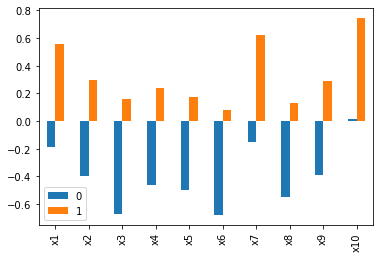

In [18]:
###PLOT FOR CONFIDENCE INTERVALS###

result.conf_int().plot(kind='bar')

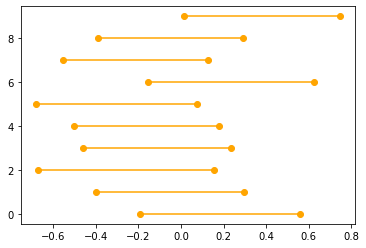

In [19]:
###ALTERNATE PLOT FOR CONFIDENCE INTERVALS###

for lower,upper,y in zip(ci[0],ci[1],range(len(ci))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
#plt.yticks(range(len(ci)))

From the confidence interval of coefficients of each variables, we can see that only x10's CI does not include 0. We do not reject the null hypothesis that SC has no effect on high blood pressure. SC may be the most important feature.

x1     1.201354
x2     0.950302
x3     0.772507
x4     0.893101
x5     0.850793
x6     0.739715
x7     1.264496
x8     0.809525
x9     0.951407
x10    1.462010
dtype: float64


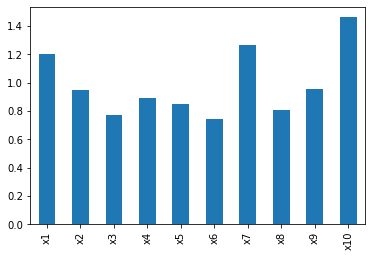

In [20]:
###SEE ODDS AND PLOT###

print(np.exp(result.params))
np.exp(result.params).plot(kind='bar')

From the odds we can see that x1(age), x7(smoking), and x10(SC) are greater than 1. As units increase on those three variables, the response is more like to be positive. We can see that x10 has the largest odds, which indicates that it may be the most important feature.

In conclusion, from the logstic regression x10(SC) is the most important feature. One unit increases in SC, ther will be 0.46 increase in high blood pressure. Also age and smoke are also important fearures. One unit increases in them will increase 0.2 and 0.26 respectively in high blood pressure.

In [21]:
###LOGISTIC REGRESSION WITH BEST FEATURES###

#Best Features Dataset
sc = StandardScaler()
y = df['high_blood_pressure'].copy()
X = df.drop(['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'serum_sodium', 'sex', 'EF', 'Plat'], axis=1)
X = sc.fit_transform(X)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)

#Apply Model
logReg = LogisticRegression(max_iter=500, penalty='l2', random_state=0)
logReg.fit(Xtrain, ytrain)
logRegPred = logReg.predict(Xtest)
print(logRegPred) 
logRegScore = round(accuracy_score(ytest, logRegPred), 2)
print('Logistic Regresion Score: ', logRegScore)
logReg_cv_score = cross_val_score(logReg, Xtrain, ytrain, cv = 5)
print('Logistic Regression CV Score: ', round(logReg_cv_score.mean(), 2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Logistic Regresion Score:  0.66
Logistic Regression CV Score:  0.59
